Folder to download all input files:
https://drive.google.com/drive/folders/1ufCCKsVAM4wP0mIW9FxPfbYelPZ0pR0p?usp=sharing



In [ ]:
!pip install netCDF4
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.1 MB/s eta 0:00:00


#EX1 (4 points):

Please download the file **Data_EX1.txt**

The file contain temperature data in 2009. Each column contain data for a month. The first column is the day of the month. -99 and 30 mean missing data. Plot the daily temperature and monthly temperature in the same plot. Show the mean value of each month.


![link text](https://i.imgur.com/Azkh0Zu.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as *
from numpy import *
from datetime import *
import seaborn as sns
from matplotlib.colors import BoundaryNorm


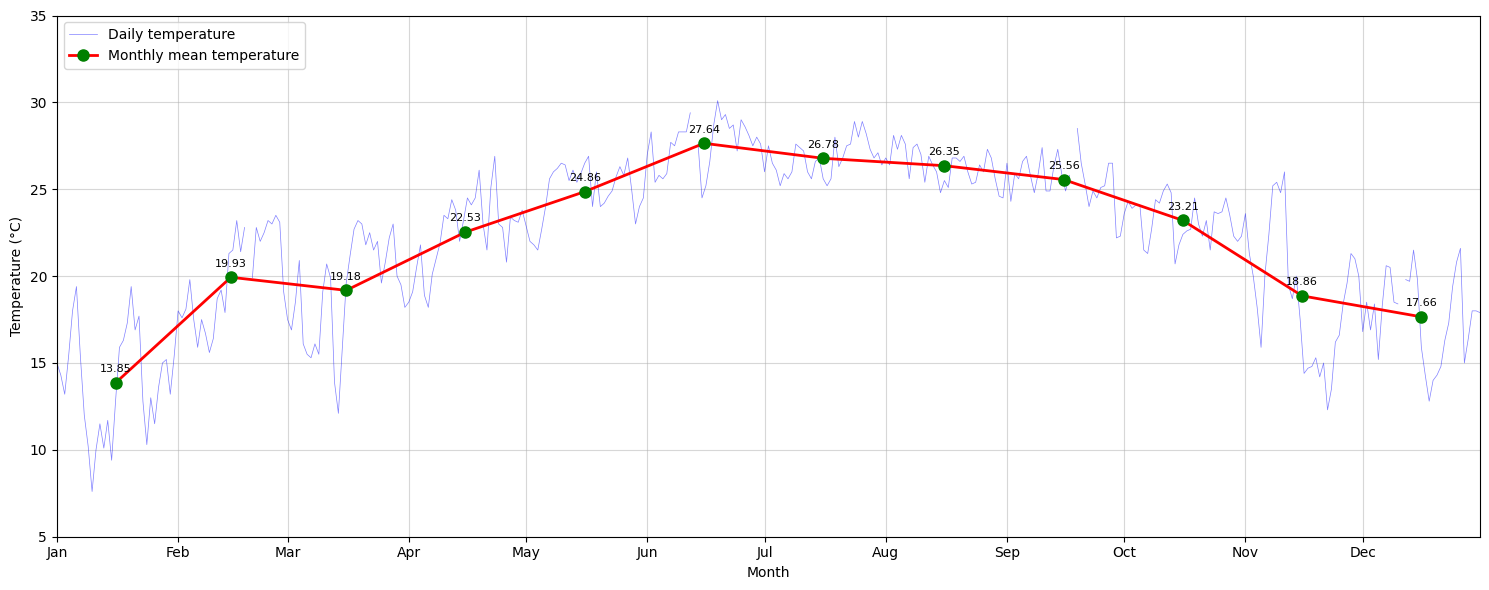

In [ ]:
#----#----#----#----#----#----#
# EX1: Basic text processing and line plot
#----#----#----#----#----#----#

data = np.loadtxt('Data_EX1.txt')

days = data[:, 0]
monthly_temps = data[:, 1:]

monthly_temps = np.where((monthly_temps == -99) | (monthly_temps == 30), np.nan, monthly_temps)

monthly_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
all_temps = []
all_dates = []

day_of_year = 0
for month_index in range(12):
    month_data = monthly_temps[:, month_index]
    valid_days = np.arange(1, monthly_lengths[month_index] + 1)
    month_data = month_data[:monthly_lengths[month_index]]

    for d, val in zip(valid_days, month_data):
        day_of_year += 1
        all_dates.append(day_of_year)
        all_temps.append(val)

all_dates = np.array(all_dates)
all_temps = np.array(all_temps, dtype=float)

monthly_means = []
month_start_day = 0
for i, m_len in enumerate(monthly_lengths):
    month_slice = all_temps[month_start_day:month_start_day+m_len]
    m_mean = np.nanmean(month_slice)
    monthly_means.append(m_mean)
    month_start_day += m_len

monthly_means = np.array(monthly_means)

month_midpoints = []
month_start = 1
for m_len in monthly_lengths:
    midpoint = month_start + (m_len - 1)/2
    month_midpoints.append(midpoint)
    month_start += m_len

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(all_dates, all_temps, color='blue', alpha=0.5, label='Daily temperature', linewidth=0.5)

ax.plot(month_midpoints, monthly_means, color='red', marker='o',
        markerfacecolor='green', markeredgecolor='green', markersize=8,
        linewidth=2, label='Monthly mean temperature')

for x, y in zip(month_midpoints, monthly_means):
    ax.text(x, y+0.5, f"{y:.2f}", ha='center', va='bottom', fontsize=8)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = []
current_day = 0
for length in monthly_lengths:
    month_ticks.append(current_day+1)
    current_day += length

ax.set_xticks(month_ticks)
ax.set_xticklabels(month_names)
ax.set_xlim(1, 365)
ax.set_ylim(5, 35)

ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

---

---

#EX2 (3 points):

**Draw the contour and heatmap of temperature in 2009**

1 day = 1 square. color palette = jet. 1 color = 1°C

![link text](https://i.imgur.com/doMRTWL.png)

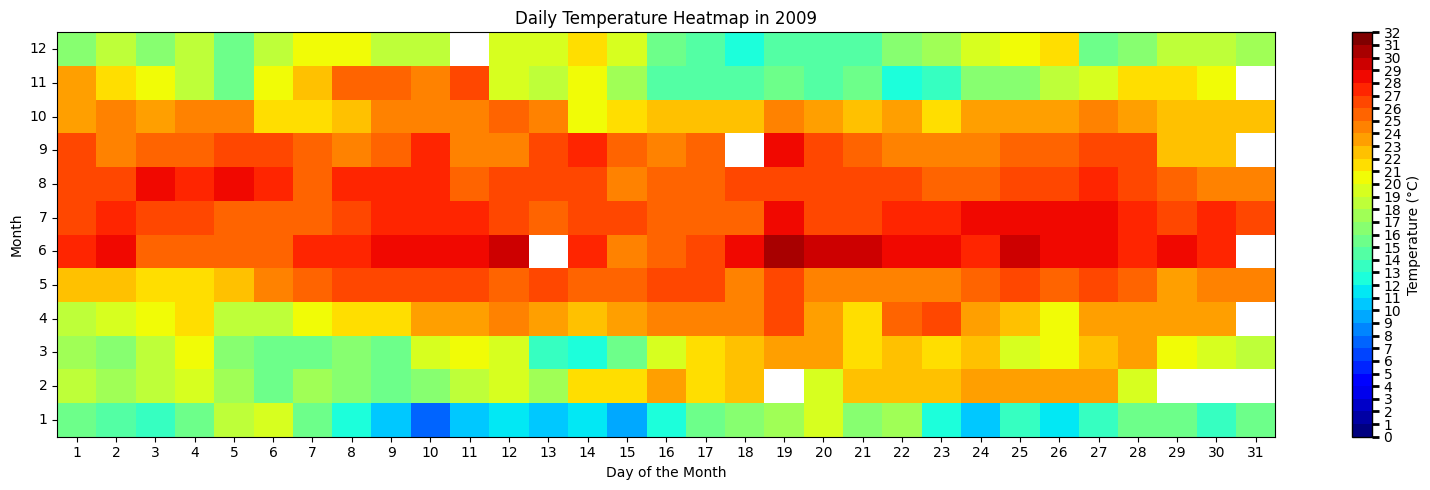

In [ ]:
#----#----#----#----#----#----#
# EX2: Heatmap
#----#----#----#----#----#----#




file = open('Data_EX1.txt', 'r')
lines = file.readlines()
file.close()
for i in range(len(lines)):
    lines[i] = lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j] = float(lines[i][j])

df = pd.DataFrame(lines)
df.dropna(axis=0, how='all', inplace=True)

def create_temperature_heatmap(df):
    df = df.replace([-99, 30], np.nan)
    df = df.iloc[::-1]
    bounds = np.linspace(0, 32, 33)
    norm = BoundaryNorm(boundaries=bounds, ncolors=256)
    plt.figure(figsize=(16, 5))
    ax = sns.heatmap(df, cmap='jet', norm=norm, cbar_kws={'boundaries': bounds, 'ticks': bounds, 'label': 'Temperature (°C)'},
                     xticklabels=range(1, 32), yticklabels=range(12, 0, -1))
    plt.title('Daily Temperature Heatmap in 2009')
    plt.xlabel('Day of the Month')
    plt.ylabel('Month')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10, width=2, length=5)
    cbar.outline.set_linewidth(1)
    plt.tight_layout()
    return plt.gcf()

df_transposed = df.T
fig = create_temperature_heatmap(df_transposed)
plt.show()

---

---

#EX3 (3 points):

Plot the box plot

![link text](https://i.imgur.com/71yRsr0.png)

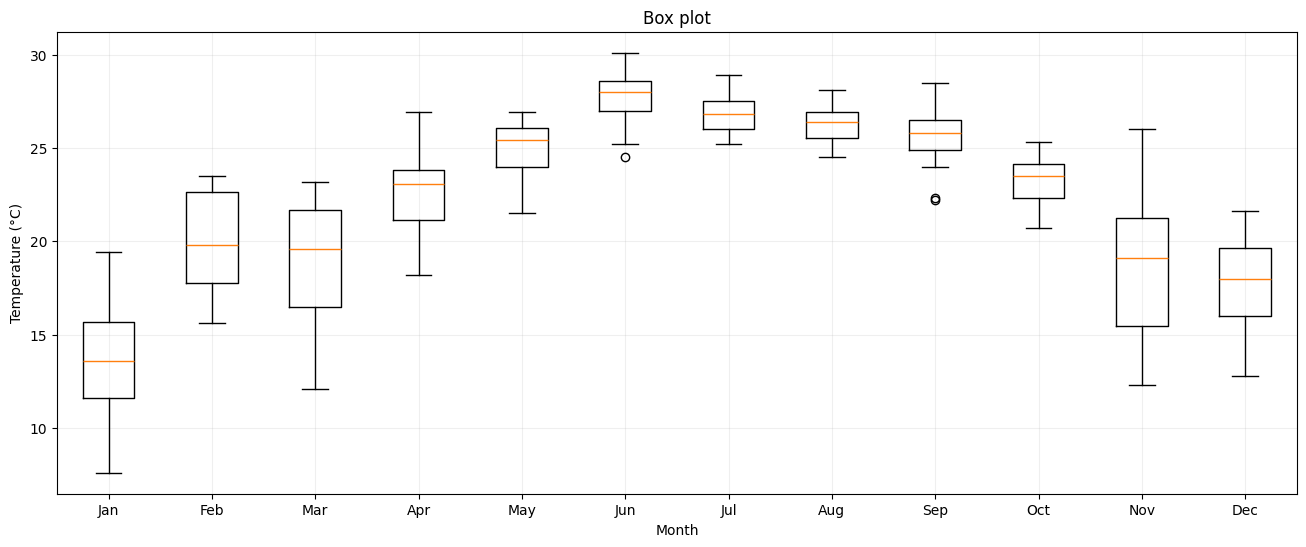

In [ ]:
#----#----#----#----#----#----#
# EX3: Box plot
#----#----#----#----#----#----#
file = open('Data_EX1.txt', 'r')
lines = file.readlines()
file.close()
for i in range(len(lines)):
    lines[i] = lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j] = float(lines[i][j])

df = pd.DataFrame(lines)
df.dropna(axis=0, how='all', inplace=True)
df = df.replace([-99.0, 30.0], float('nan'))

plt.figure(figsize=(16, 6))
plt.boxplot([df[col].dropna() for col in df.columns])
plt.grid(True, alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Box plot')
plt.show()

---

---


#EX4 (4 points): Shapefile processing
We have 4000 stations below.
Using the shapefile provided:


1 . Plot only the station inside "Quảng Ninh". Counts the number of station.


2 . Since Quang Ninh has many islands. Plot only the station in the mainland of "Quảng Ninh". Counts the number of station.

![link text](https://i.imgur.com/AgOlmV8.png)

In [ ]:
import geopandas as gpd

In [ ]:
import geopandas as gpd

file_paths = [
    "./gadm41_VNM_shp/gadm41_VNM_1.shp",
    "./gadm41_VNM_shp/gadm41_VNM_2.shp",
    "./gadm41_VNM_shp/gadm41_VNM_3.shp"
]

for file_path in file_paths:
    print(f"Inspecting file: {file_path}")
    data = gpd.read_file(file_path)
    print(data.head()) 
    print(data.columns)  
    print(data.geom_type.unique())  
    print("\n")


Inspecting file: ./gadm41_VNM_shp/gadm41_VNM_1.shp
     GID_1 GID_0  COUNTRY             NAME_1          VARNAME_1 NL_NAME_1  \
0  VNM.1_1   VNM  Vietnam           An Giang           An Giang        NA   
1  VNM.7_1   VNM  Vietnam  Bà Rịa - Vũng Tàu  Ba Ria - Vung Tau        NA   
2  VNM.3_1   VNM  Vietnam          Bắc Giang          Bac Giang        NA   
3  VNM.4_1   VNM  Vietnam            Bắc Kạn            Bac Kan        NA   
4  VNM.2_1   VNM  Vietnam           Bạc Liêu           Bac Lieu        NA   

  TYPE_1 ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0   Tỉnh  Province   NA  VN.AG  VN-44   
1   Tỉnh  Province   NA  VN.BV     NA   
2   Tỉnh  Province   NA  VN.BG     NA   
3   Tỉnh  Province   NA  VN.BK     NA   
4   Tỉnh  Province   NA  VN.BL     NA   

                                            geometry  
0  POLYGON ((105.54862 10.42948, 105.54948 10.425...  
1  MULTIPOLYGON (((107.09013 10.32397, 107.08952 ...  
2  POLYGON ((106.28382 21.13225, 106.27898 21.132...  
3  POLYGON ((105.87

In [ ]:
!pip install basemap

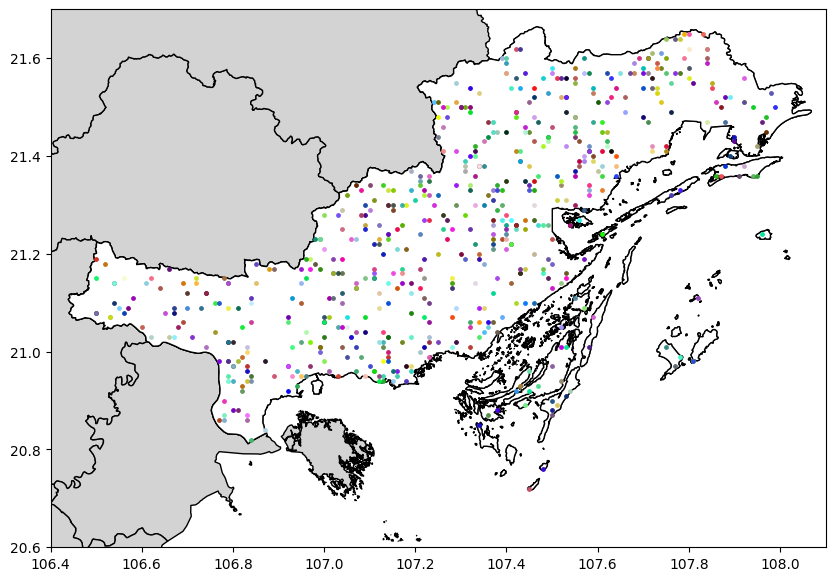

Number of stations in Quảng Ninh: 630


In [ ]:
random.seed(seed=180793)

x_location = random.randint (10650, 10800, 2000)/100
y_location = random.randint (2060, 2170, 2000)/100

stations = list(zip(x_location, y_location))

#----#----#----#----#----#----#
# EX4: PUT CODE HERE
#----#----#----#----#----#----#
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(stations))]

station_gdf = gpd.GeoDataFrame(
    {"color": colors},
    geometry=gpd.points_from_xy([coord[0] for coord in stations], [coord[1] for coord in stations]),
    crs="EPSG:4326"
)

shapefile_path = "./gadm41_VNM_shp/gadm41_VNM_1.shp"
data = gpd.read_file(shapefile_path)

quang_ninh = data[data['NAME_1'] == 'Quảng Ninh']

if station_gdf.crs != quang_ninh.crs:
    station_gdf = station_gdf.to_crs(quang_ninh.crs)

stations_in_quang_ninh = gpd.sjoin(station_gdf, quang_ninh, how='inner', predicate='within')

fig, ax = plt.subplots(figsize=(10, 10))

data.plot(ax=ax, color='lightgray', edgecolor='black')

quang_ninh.plot(ax=ax, color='white', edgecolor='black')

for idx, row in stations_in_quang_ninh.iterrows():
    ax.scatter(row.geometry.x, row.geometry.y, color=row['color'], s=6)

ax.set_xlim(106.4, 108.1)
ax.set_ylim(20.6, 21.7)
plt.show()

num_stations = len(stations_in_quang_ninh)
print(f"Number of stations in Quảng Ninh: {num_stations}")


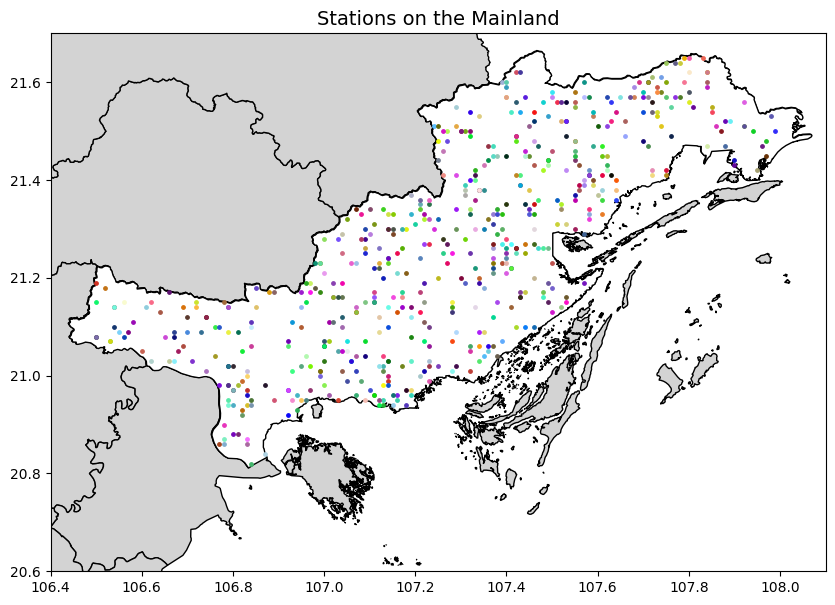

Number of stations on the mainland of Quảng Ninh: 584


In [ ]:
station_gdf = gpd.GeoDataFrame(
    {"color": colors},
    geometry=gpd.points_from_xy([coord[0] for coord in stations], [coord[1] for coord in stations]),
    crs="EPSG:4326"
)

shapefile_path = "./gadm41_VNM_shp/gadm41_VNM_1.shp"
data = gpd.read_file(shapefile_path)

quang_ninh = data[data['NAME_1'] == 'Quảng Ninh']

if station_gdf.crs != quang_ninh.crs:
    station_gdf = station_gdf.to_crs(quang_ninh.crs)

mainland_polygon = quang_ninh.geometry.iloc[0]
if mainland_polygon.geom_type == 'MultiPolygon':
    mainland_polygon = max(mainland_polygon.geoms, key=lambda p: p.area)

mainland_gdf = gpd.GeoDataFrame(geometry=[mainland_polygon], crs=quang_ninh.crs)

stations_in_mainland = station_gdf[station_gdf.geometry.within(mainland_polygon)]

fig, ax = plt.subplots(figsize=(10, 10))

data.plot(ax=ax, color='lightgray', edgecolor='black')

mainland_gdf.plot(ax=ax, color='white', edgecolor='black')

for idx, row in stations_in_mainland.iterrows():
    ax.scatter(row.geometry.x, row.geometry.y, color=row['color'], s=6)

ax.set_xlim(106.4, 108.1)
ax.set_ylim(20.6, 21.7)

ax.set_title("Stations on the Mainland", fontsize=14)
plt.show()

num_stations_mainland = len(stations_in_mainland)
print(f"Number of stations on the mainland of Quảng Ninh: {num_stations_mainland}")

---

---

#EX5 (3 points):

Imagine that you are a business man, and you sell 3 kinds of fruit: apple, banana, and durian :)))

You have 10 stores. Now, you want to know which store sell the most, which month sell the most, and which fruit sell the most.

1. Use Pie chart, Draw the pie plot for 12 months, 10 stations. The radius of the pie chart is proportional to the total sale.

For example, if  
* < 40: radi = 0.1
* < 60:   radi = 0.3
* < 80:   radi = 0.5
* < 100:  radi = 0.7
* More than 100: radi = 1.


2. Which station sell the most?

![link text](https://i.imgur.com/4vOkn08.png)

/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/3458975932.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


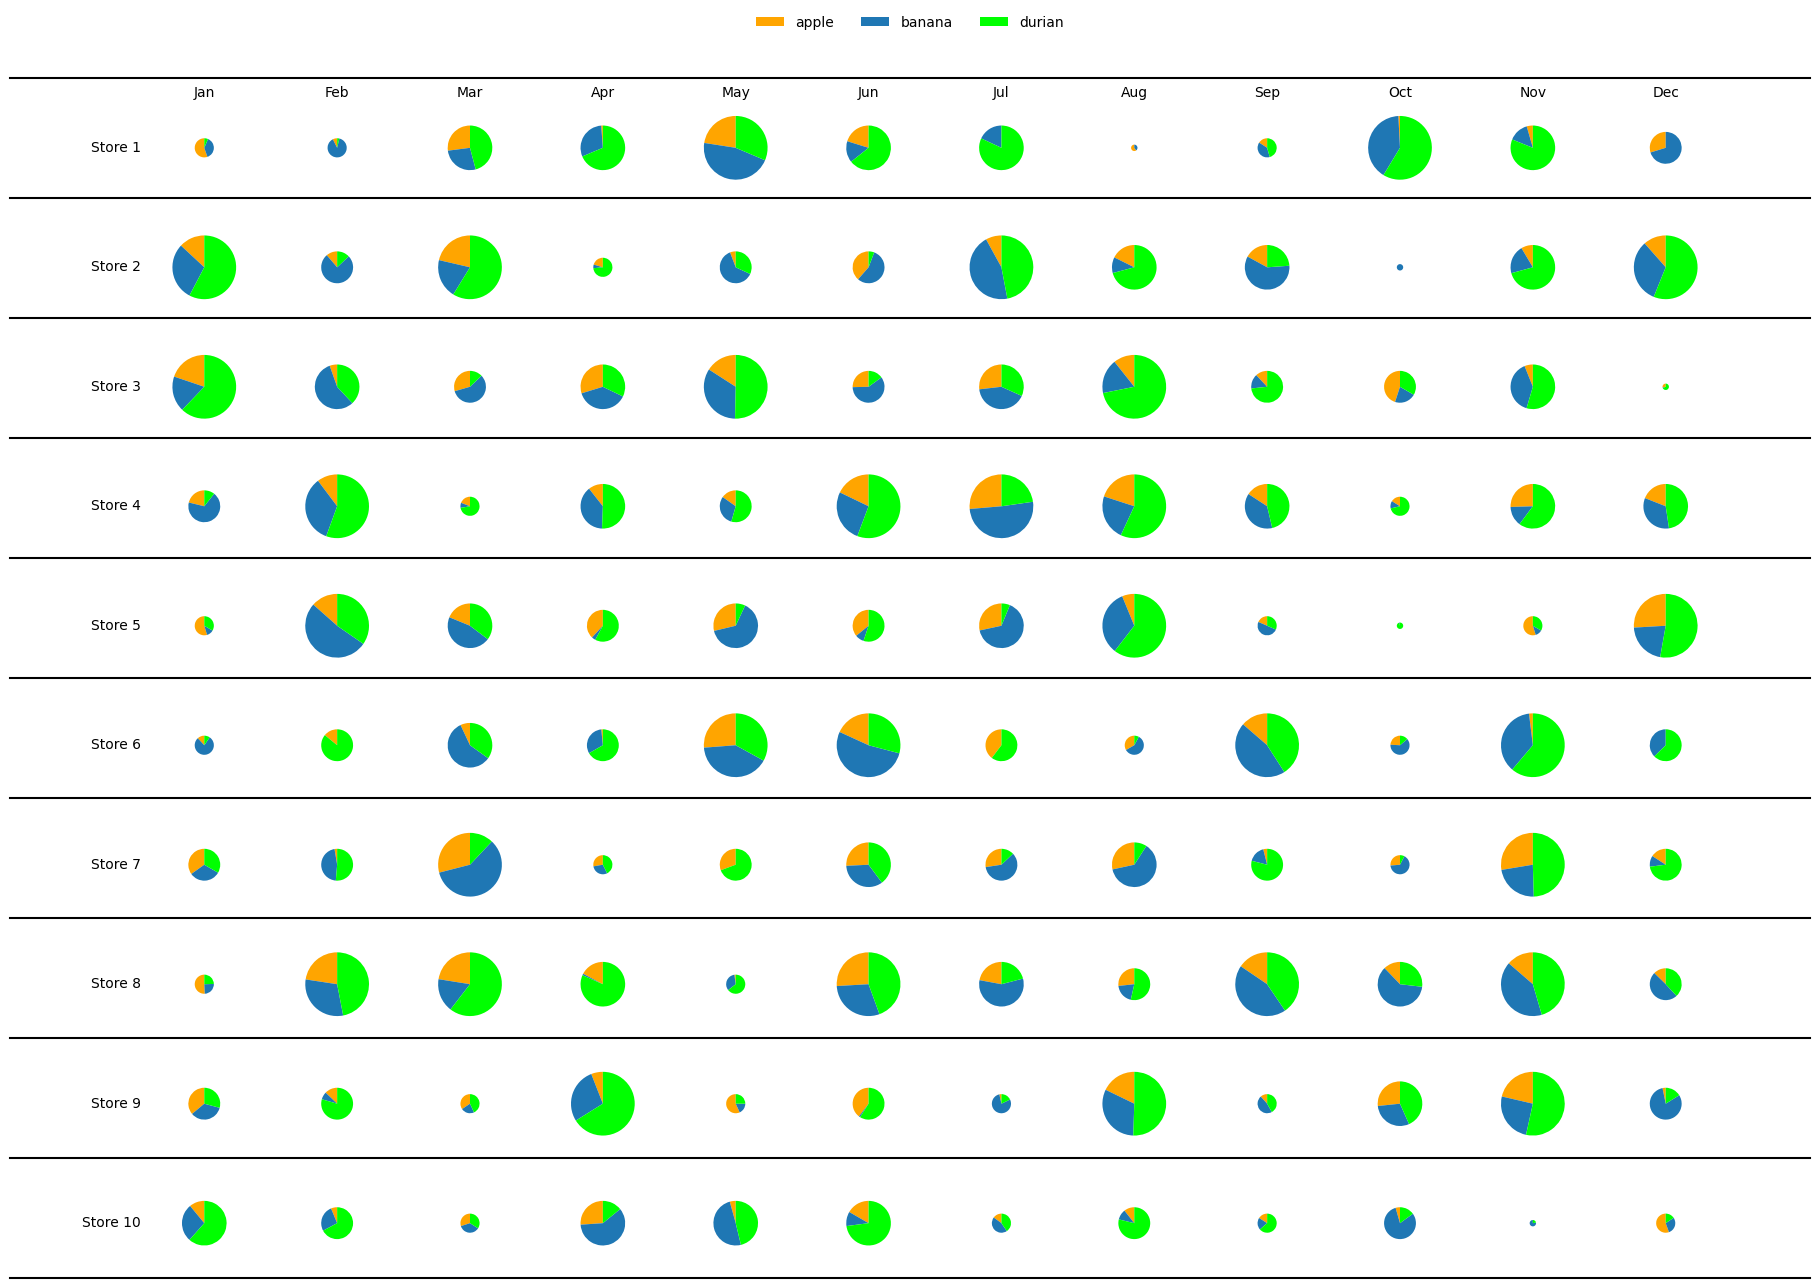

In [ ]:
#----#----#----#----#----#----#
# EX5: Pie chart and customized plot
#----#----#----#----#----#----#


import matplotlib.colors as colors
from matplotlib.colors import BoundaryNorm


random.seed(seed=180793)
apple = random.randint(0, 30, size = (10,12))       #10 stores, 12 months
banana = random.randint(0, 60, size = (10,12))      #10 stores, 12 months
durian = random.randint(0, 80, size = (10,12))      #10 stores, 12 months

#----#----#----#----#----#----#
#Put your code after this line
#----#----#----#----#----#----#
# Total sales per store and month
total_sales = apple + banana + durian

# Function to determine the radius based on total sales
def get_radius(sales):
    if sales < 40:
        return 0.1
    elif sales < 60:
        return 0.3
    elif sales < 80:
        return 0.5
    elif sales < 100:
        return 0.7
    else:
        return 1.0

# Month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Create the grid layout for the plot
fig, axes = plt.subplots(10, 12, figsize=(20, 15), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

for store in range(10):  # For each store (rows)
    for month in range(12):  # For each month (columns)
        # Data for the pie chart
        sizes = [apple[store, month], banana[store, month], durian[store, month]]
        colors = ['orange', 'tab:blue', 'lime']
        total = sum(sizes)
        radius = get_radius(total)

        # Plot the pie chart
        axes[store, month].pie(
            sizes,
            labels=None,
            autopct=None,
            startangle=90,
            colors=colors,
            radius=radius
        )
        axes[store, month].set(aspect='equal')  # Equal aspect ratio

        # Remove axes for a cleaner look
        axes[store, month].axis('off')

for i in range(1, 10):
    line = Line2D([0, 1], [1 - (i / 10), 1 - (i / 10)], transform=fig.transFigure, color="black", linewidth=1, linestyle="--")
    fig.add_artist(line)
for store in range(10):
    axes[store, 0].text(-2, 0, f"Store {store + 1}", va='center', ha='right', fontsize=10)

for month in range(12):
    axes[0, month].text(0, 1.5, month_names[month], va='bottom', ha='center', fontsize=10)

# Add a legend
fig.legend(
    labels=['apple', 'banana', 'durian'],
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 0.95),
    fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate total sales for each store
total_sales_per_store = apple.sum(axis=1) + banana.sum(axis=1) + durian.sum(axis=1)

store_with_most_sales = total_sales_per_store.argmax() + 1
for store, sales in enumerate(total_sales_per_store, start=1):
    print(f"Store {store}: Total Sales = {sales}")
print("#############################################")
print(f"===> Store {store_with_most_sales} sells the most with total sales of {total_sales_per_store[store_with_most_sales - 1]}.")



Store 1: Total Sales = 905
Store 2: Total Sales = 1046
Store 3: Total Sales = 1030
Store 4: Total Sales = 1107
Store 5: Total Sales = 917
Store 6: Total Sales = 920
Store 7: Total Sales = 911
Store 8: Total Sales = 1091
Store 9: Total Sales = 926
Store 10: Total Sales = 787
#############################################
===> Store 4 sells the most with total sales of 1107.


---

---

#EX6 (3 points) Customized line plot:

**Data_EX6.txt** contain the precipitation data for observation and 3 simulations for a year in 2010. -99 means missing value. Remove it.

Plot the precipitation frequency by threshold in 4 differsent seasons (Dec-Jan-Feb, Mar-Apr-May, Jun-Jul-Aug, Sep-Oct-Nov). If data is missing in observation, the corresponding data in simulations need to be removed before further processing.


![link text](https://i.imgur.com/xQuurna.png)

In [ ]:
#----#----#----#----#----#----#
# EX6: PUT YOUR CODE HERE
#----#----#----#----#----#----#



with open('Data_EX6.txt', 'r') as file:
    raw_lines = file.readlines()

sections = ["OBS", "SIMU_1", "SIMU_2", "SIMU_3"]
section_indices = {section: raw_lines.index(section + "\n") + 1 for section in sections}

dataframes = {}

for i, section in enumerate(sections):
    start = section_indices[section]
    end = section_indices[sections[i + 1]] if i + 1 < len(sections) else None

    section_data = pd.read_csv(
        'Data_EX6.txt',
        delim_whitespace=True,
        header=None,
        skiprows=start,
        nrows=(end - start) if end else None
    )

    section_data = section_data.iloc[:, 1:]
    section_data.replace(-99, np.nan, inplace=True)

    dataframes[section] = section_data

obs_df = dataframes["OBS"]
simu_1_df = dataframes["SIMU_1"]
simu_2_df = dataframes["SIMU_2"]
simu_3_df = dataframes["SIMU_3"]

obs_df.head(), simu_1_df.head(), simu_2_df.head(), simu_3_df.head()

/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/2992092289.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes[section] = pd.read_csv(
/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/2992092289.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes[section] = pd.read_csv(
/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/2992092289.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes[section] = pd.read_csv(
/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/2992092289.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` i

(    1    2    3    4    5     6     7     8    9     10   11   12
 0  0.0  0.0  0.0  0.0  0.0   2.5   0.0  19.0  0.0  27.2  0.0  0.0
 1  0.0  0.0  0.0  0.0  0.0  24.5   1.6   1.2  0.0   0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0  0.0   0.0   7.2   4.0  0.0   8.4  0.0  3.2
 3  0.0  0.0  0.0  0.0  0.1   0.5  13.1   0.0  0.0  67.7  0.0  9.2
 4  0.0  0.0  0.0  0.0  3.6  14.0   0.0  13.6  0.0  40.3  0.0  0.1,
     1    2    3    4    5     6     7     8     9     10    11    12
 0  0.0  0.0  0.0  0.0  6.5   1.6   0.0  10.8   0.0   0.0  49.5   3.7
 1  0.0  0.0  0.0  0.0  0.0  16.2   0.0  21.6  17.8   5.5   1.6   1.3
 2  0.0  0.0  0.0  0.0  0.0   1.8  11.1   6.1   5.9  26.0  47.7  17.7
 3  0.0  0.0  0.0  0.0  8.5   1.4   0.0  32.9   0.2   0.8   0.0   0.2
 4  0.0  0.0  0.0  0.0  0.1   2.6   6.1  24.3   0.0   0.0  36.3   0.1,
     1    2    3    4    5     6     7     8     9     10   11   12
 0  0.0  0.0  0.0  0.0  0.8  49.3   0.3   0.5   6.8  51.3  0.0  0.0
 1  0.0  0.0  0.0  0.0  0.0  27.0   7.3 

/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/1235594381.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes[section] = pd.read_csv(
/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/1235594381.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes[section] = pd.read_csv(
/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/1235594381.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframes[section] = pd.read_csv(
/var/folders/qr/vsxkbzcs7sj_g26myvv_5svh0000gn/T/ipykernel_2222/1235594381.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` i

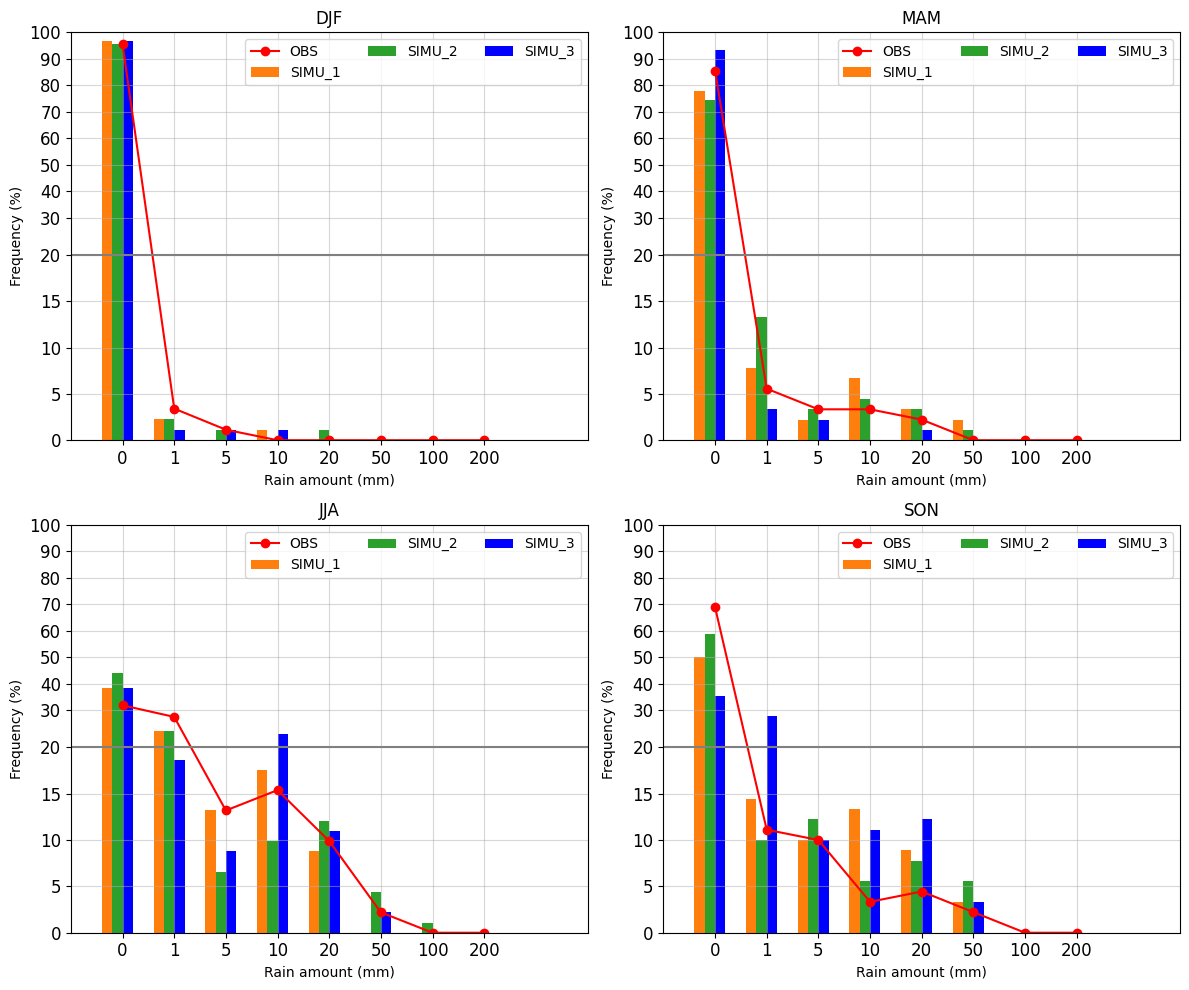

In [ ]:
seasons = {
    "DJF": [11, 0, 1],
    "MAM": [2, 3, 4],
    "JJA": [5, 6, 7],
    "SON": [8, 9, 10]
}
thresholds = [0, 1, 5, 10, 20, 50, 100, 200, 300]

def y_transform(y):
    y = np.array(y)
    return np.where(
        y <= 20,
        y * 2.5,
        60 + 50 * (y - 30) / 70
    )

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (season, months) in enumerate(seasons.items()):
    obs_season = obs_df.iloc[:, months].values.flatten()
    simu_1_season = simu_1_df.iloc[:, months].values.flatten()
    simu_2_season = simu_2_df.iloc[:, months].values.flatten()
    simu_3_season = simu_3_df.iloc[:, months].values.flatten()

    min_length = min(len(obs_season), len(simu_1_season), len(simu_2_season), len(simu_3_season))
    obs_season, simu_1_season, simu_2_season, simu_3_season = (
        obs_season[:min_length],
        simu_1_season[:min_length],
        simu_2_season[:min_length],
        simu_3_season[:min_length],
    )
    valid_mask = ~np.isnan(obs_season) & ~np.isnan(simu_1_season) & ~np.isnan(simu_2_season) & ~np.isnan(simu_3_season)

    obs_season = obs_season[valid_mask]
    simu_1_season = simu_1_season[valid_mask]
    simu_2_season = simu_2_season[valid_mask]
    simu_3_season = simu_3_season[valid_mask]

    obs_freq = [
        np.sum((obs_season >= t) & (obs_season < (thresholds[i + 1] if i + 1 < len(thresholds) else np.inf)))
        for i, t in enumerate(thresholds[:-1])
    ]
    simu_1_freq = [
        np.sum((simu_1_season >= t) & (simu_1_season < (thresholds[i + 1] if i + 1 < len(thresholds) else np.inf)))
        for i, t in enumerate(thresholds[:-1])
    ]
    simu_2_freq = [
        np.sum((simu_2_season >= t) & (simu_2_season < (thresholds[i + 1] if i + 1 < len(thresholds) else np.inf)))
        for i, t in enumerate(thresholds[:-1])
    ]
    simu_3_freq = [
        np.sum((simu_3_season >= t) & (simu_3_season < (thresholds[i + 1] if i + 1 < len(thresholds) else np.inf)))
        for i, t in enumerate(thresholds[:-1])
    ]

    obs_freq = np.array(obs_freq) / len(obs_season) * 100
    simu_1_freq = np.array(simu_1_freq) / len(simu_1_season) * 100
    simu_2_freq = np.array(simu_2_freq) / len(simu_2_season) * 100
    simu_3_freq = np.array(simu_3_freq) / len(simu_3_season) * 100

    obs_freq_transformed = y_transform(obs_freq)
    simu_1_freq_transformed = y_transform(simu_1_freq)
    simu_2_freq_transformed = y_transform(simu_2_freq)
    simu_3_freq_transformed = y_transform(simu_3_freq)

    ax = axes[idx]

    x_labels = thresholds[:-1]
    x = np.arange(len(thresholds) - 1)

    ax.plot(x, obs_freq_transformed, marker='o', linestyle='-', color='red', label='OBS')

    width = 0.2
    ax.bar(x - width * 1.5, simu_1_freq_transformed, width, color='tab:orange', label='SIMU_1')
    ax.bar(x - width / 2, simu_2_freq_transformed, width, color='tab:green', label='SIMU_2')
    ax.bar(x + width / 2, simu_3_freq_transformed, width, color='blue', label='SIMU_3')

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.set_xlim(-1, len(thresholds))
    ax.set_title(season)
    ax.set_xlabel("Rain amount (mm)")
    ax.set_ylabel("Frequency (%)")
    ax.legend(loc='upper right', ncol=3)
    ax.grid(True, linestyle='-', alpha=0.5)

    normal_ticks = np.arange(0, 21, 5)
    compressed_ticks = np.arange(30, 101, 10)

    y_ticks = np.concatenate([normal_ticks, compressed_ticks])

    transformed_ticks = y_transform(y_ticks)

    ax.set_yticks(transformed_ticks)
    ax.set_yticklabels(y_ticks)

    ax.axhline(y=y_transform(20), color='gray', linestyle='-')

    ax.set_ylim(0, y_transform(100))

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()